In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("F:\\3month_kerla.csv")

In [3]:
df

,SUBDIVISION,YEAR,MAY,JUN,JUL,RAINFALL,FLOODS
0,KERALA,1901,174.7,824.6,743.0,1742.3,YES
1,KERALA,1902,134.5,390.9,1205.0,1730.4,YES
2,KERALA,1903,249.7,558.6,1022.5,1830.8,YES
3,KERALA,1904,235.7,1098.2,725.5,2059.4,YES
4,KERALA,1905,263.3,850.2,520.5,1634.0,NO
...,...,...,...,...,...,...,...
113,KERALA,2014,251.0,454.4,677.8,1383.2,YES
114,KERALA,2015,201.8,563.6,406.0,1171.4,NO
115,KERALA,2016,186.4,522.2,412.3,1120.9,NO
116,KERALA,2017,173.5,498.5,319.6,991.6,NO


In [4]:
df=df.drop('SUBDIVISION', axis=1)

In [5]:
df

,YEAR,MAY,JUN,JUL,RAINFALL,FLOODS
0,1901,174.7,824.6,743.0,1742.3,YES
1,1902,134.5,390.9,1205.0,1730.4,YES
2,1903,249.7,558.6,1022.5,1830.8,YES
3,1904,235.7,1098.2,725.5,2059.4,YES
4,1905,263.3,850.2,520.5,1634.0,NO
...,...,...,...,...,...,...
113,2014,251.0,454.4,677.8,1383.2,YES
114,2015,201.8,563.6,406.0,1171.4,NO
115,2016,186.4,522.2,412.3,1120.9,NO
116,2017,173.5,498.5,319.6,991.6,NO


In [6]:
df.shape

(118, 6)

In [7]:
df.head(5)

,YEAR,MAY,JUN,JUL,RAINFALL,FLOODS
0,1901,174.7,824.6,743.0,1742.3,YES
1,1902,134.5,390.9,1205.0,1730.4,YES
2,1903,249.7,558.6,1022.5,1830.8,YES
3,1904,235.7,1098.2,725.5,2059.4,YES
4,1905,263.3,850.2,520.5,1634.0,NO


In [8]:
df['FLOOD'] = df['FLOODS'].replace({'YES': 1, 'NO': 0})

In [9]:
df

,YEAR,MAY,JUN,JUL,RAINFALL,FLOODS,FLOOD
0,1901,174.7,824.6,743.0,1742.3,YES,1
1,1902,134.5,390.9,1205.0,1730.4,YES,1
2,1903,249.7,558.6,1022.5,1830.8,YES,1
3,1904,235.7,1098.2,725.5,2059.4,YES,1
4,1905,263.3,850.2,520.5,1634.0,NO,0
...,...,...,...,...,...,...,...
113,2014,251.0,454.4,677.8,1383.2,YES,1
114,2015,201.8,563.6,406.0,1171.4,NO,0
115,2016,186.4,522.2,412.3,1120.9,NO,0
116,2017,173.5,498.5,319.6,991.6,NO,0


In [10]:
df=df.drop('FLOODS', axis=1)

In [11]:
df

,YEAR,MAY,JUN,JUL,RAINFALL,FLOOD
0,1901,174.7,824.6,743.0,1742.3,1
1,1902,134.5,390.9,1205.0,1730.4,1
2,1903,249.7,558.6,1022.5,1830.8,1
3,1904,235.7,1098.2,725.5,2059.4,1
4,1905,263.3,850.2,520.5,1634.0,0
...,...,...,...,...,...,...
113,2014,251.0,454.4,677.8,1383.2,1
114,2015,201.8,563.6,406.0,1171.4,0
115,2016,186.4,522.2,412.3,1120.9,0
116,2017,173.5,498.5,319.6,991.6,0


In [12]:
x = df.iloc[:, :-1].values

In [13]:
y = df.iloc[:, -1].values

In [14]:
x

array([[1901. ,  174.7,  824.6,  743. , 1742.3],
       [1902. ,  134.5,  390.9, 1205. , 1730.4],
       [1903. ,  249.7,  558.6, 1022.5, 1830.8],
       [1904. ,  235.7, 1098.2,  725.5, 2059.4],
       [1905. ,  263.3,  850.2,  520.5, 1634. ],
       [1906. ,  160.8,  414.9,  954.2, 1529.9],
       [1907. ,  101.4,  770.9,  760.4, 1632.7],
       [1908. ,  142.6,  592.6,  902.2, 1637.4],
       [1909. ,  473.2,  704.7,  782.3, 1960.2],
       [1910. ,  148.8,  680. ,  484.1, 1312.9],
       [1911. ,  180.6,  990. ,  705.3, 1875.9],
       [1912. ,  217.3,  948.2,  833.6, 1999.1],
       [1913. ,  198.8,  541.7,  763.2, 1503.7],
       [1914. ,  164.2,  565.3,  857.7, 1587.2],
       [1915. ,  154.5,  696.1,  775.6, 1626.2],
       [1916. ,  199. ,  920.2,  513.9, 1633.1],
       [1917. ,  122.9,  703.7,  342.7, 1169.3],
       [1918. ,  683. ,  464.3,  167.5, 1314.8],
       [1919. ,  247. ,  636.8,  648. , 1531.8],
       [1920. ,   87.7,  964.3,  940.8, 1992.8],
       [1921. ,  104

In [15]:
y

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [17]:
sc = StandardScaler()

In [18]:
x_train = sc.fit_transform(x_train)

In [19]:
x_test = sc.transform(x_test)

In [20]:
x_train

array([[-1.55936711e+00,  1.60871959e-01, -5.27572523e-01,
         1.55537363e+00,  7.75907997e-01],
       [ 1.75586248e+00, -1.70801691e-01, -5.00725502e-01,
        -1.35194979e+00, -1.23210722e+00],
       [-1.35216526e+00, -5.37789236e-01,  1.24273147e-01,
        -9.83641663e-01, -8.01209203e-01],
       [ 5.42251648e-01, -3.43931122e-02, -2.09382773e+00,
         1.46907352e+00, -2.53983946e-01],
       [-2.27355220e-01, -9.80966107e-02,  1.36030999e+00,
        -3.47473084e-01,  5.03970236e-01],
       [-2.01533713e-02,  2.20007634e+00,  6.74100137e-01,
        -1.41419905e+00,  4.36670970e-01],
       [ 1.57448214e-01,  1.89748472e+00,  1.87040339e+00,
         2.14013941e+00,  3.27724816e+00],
       [-1.26336447e+00, -1.91574570e-01, -6.18315454e-01,
         3.32552928e-01, -2.20182052e-01],
       [ 9.56655346e-01, -4.79625172e-01, -7.81545342e-01,
        -8.95455210e-01, -1.23241174e+00],
       [ 9.82476853e-02,  8.35990557e-01,  1.15949428e+00,
         2.18352526e+00

In [21]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

# Read 

Based on past data analysis, a notable trend has emerged, indicating a higher frequency of flooding incidents in the Kerala region during the month of August. To gain a better understanding of this trend, we have gathered data from the preceding three months: May, June, and July. The purpose of this data collection is to provide five key parameters, which are the YEAR, MAY, JUNE, JULY, and the cumulative RAINFALL for these three months. This comprehensive dataset will allow us to explore and analyze the factors contributing to flooding incidents in a more informed manner.

In [22]:
year = int(input("Enter the year: "))
may = float(input("Enter the rainfall for the month of MAY: "))
june = float(input("Enter the rainfall for the month of JUNE: "))
july = float(input("Enter the rainfall for the month of JULY: "))
total_rainfall = may + june + july

flood = [[year, may, june, july, total_rainfall]]

# Assuming you have defined 'model' and 'sc' elsewhere in your code
result = model.predict(sc.transform(flood))

print(f"The total rainfall is: {total_rainfall}")
print(result)

if result == 1:
    print("Flood will occur")
else:
    print("Flood won't occur")


Enter the year: 2018
Enter the rainfall for the month of MAY: 183.8
Enter the rainfall for the month of JUNE: 625.4
Enter the rainfall for the month of JULY: 1048.5
The total rainfall is: 1857.7
[1]
Flood will occur


In [23]:
y_pred = model.predict(x_test)

In [24]:
print(f"Accuracy of the model is : {accuracy_score(y_test, y_pred)*100}%")
print("Prediction is Done ")

Accuracy of the model is : 79.16666666666666%
Prediction is Done 


In [25]:
#2018	183.8	625.4	1048.5	1857.7	1
#2015	201.8	563.6	406.0	1171.4	0

In [26]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Yearly Rainfall Distribution')

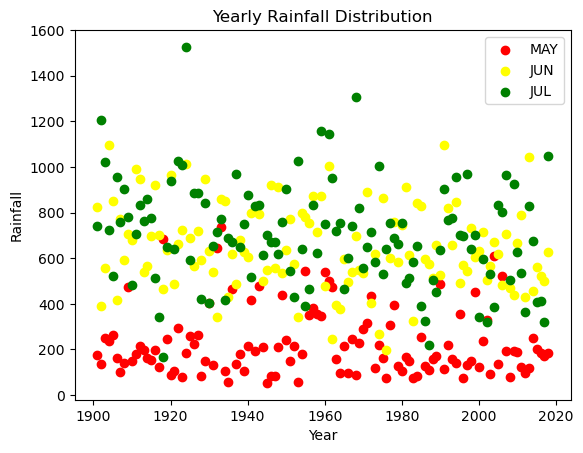

In [27]:
# plt.scatter(df['YEAR'], df['RAINFALL'], color='blue', label='RAINFALL')
plt.scatter(df['YEAR'], df['MAY'], color='red', label='MAY')
plt.scatter(df['YEAR'], df['JUN'], color='yellow', label='JUN')
plt.scatter(df['YEAR'], df['JUL'], color='green', label='JUL')
plt.legend(loc='upper right')
plt.xlabel('Year')
plt.ylabel('Rainfall')
plt.title('Yearly Rainfall Distribution')

**Title:** Predicting Floods in Kerala using Machine Learning and Logistic Regression

**1. Introduction:**

Floods are a recurring natural disaster in the coastal state of Kerala, India, posing a significant threat to lives, property, and the environment. This article explores the application of Machine Learning (ML) techniques, specifically Logistic Regression, to predict floods in the Kerala region.

Kerala, known for its unique geographical and climatic conditions, experiences a high frequency of flooding events, with a noticeable trend occurring during the monsoon season, particularly in August. In an effort to better understand this trend, we have collected and analyzed data from the preceding three months: May, June, and July. This dataset includes crucial parameters such as the YEAR, rainfall data for each of the three months (MAY, JUNE, and JULY), and the cumulative RAINFALL for this period. This comprehensive dataset empowers us to delve into the factors contributing to flooding incidents in a more informed manner.

Logistic regression is a fundamental statistical technique used in flood prediction models. It's employed to assess the probability of a binary outcome, such as the occurrence of a flood. By analyzing various input variables, such as weather data, river levels, and historical flood records, logistic regression helps quantify the likelihood of a flood event, enabling more accurate predictions and informed decision-making in disaster management and prevention.

**2. Problem Statement:**

The primary objective of this project is to build a predictive model using Logistic Regression to determine the likelihood of floods occurring in Kerala based on historical rainfall data. This predictive model will serve as a valuable tool for early flood warnings, assisting in disaster preparedness and response.

Traditional flood prediction methods have their limitations, often failing to provide accurate and timely warnings. Machine Learning, particularly Logistic Regression, offers the potential for more precise predictions by analyzing historical data and identifying patterns that may lead to flooding.

**3. Data Collection:**

The dataset used for this project includes historical rainfall data for Kerala, spanning several decades. Each record in the dataset comprises the YEAR, rainfall data for the months of MAY, JUNE, and JULY, cumulative RAINFALL, and a binary column denoting the presence of floods (FLOODS: YES/NO).

**4. Methodology:**

The Logistic Regression model is employed for this flood prediction project. Logistic Regression is a suitable choice due to its ability to model binary outcomes, making it ideal for predicting events like floods. It leverages historical data to create a mathematical model that can assess the probability of a flood occurring based on rainfall patterns.

The dataset's features include the cumulative RAINFALL for the preceding three months, which the Logistic Regression model utilizes to make predictions.

**5. Model Evaluation:**

The model's performance is evaluated using standard machine learning metrics, including accuracy, precision, recall, and F1 score. These metrics provide insight into the model's ability to accurately predict flood occurrences compared to traditional methods.

**6. Results and Discussion:**

Analysis of the model's results reveals that it can provide early warnings of floods in Kerala. By studying the historical data, our model demonstrates a promising level of accuracy in predicting floods during the monsoon season. The significance of these findings cannot be understated, as timely flood warnings can save lives and minimize property damage.

Challenges encountered during the project, including data quality and model tuning, were addressed to enhance the model's performance.

**7. Conclusion:**

In conclusion, this project showcases the potential of Machine Learning, specifically Logistic Regression, in predicting floods in the Kerala region. The model's ability to analyze historical rainfall data and make accurate predictions can contribute significantly to disaster preparedness and response efforts. It's an important step towards mitigating the impact of frequent flooding in Kerala.

**8. Future Work:**

Future work involves expanding the dataset to include more years and additional features, integrating real-time weather data, and exploring more advanced machine learning models to further enhance flood prediction accuracy.


# Regression Model 

In [28]:
df1 = pd.read_csv("F:\\3month_kerla.csv")

In [29]:
df1

,SUBDIVISION,YEAR,MAY,JUN,JUL,RAINFALL,FLOODS
0,KERALA,1901,174.7,824.6,743.0,1742.3,YES
1,KERALA,1902,134.5,390.9,1205.0,1730.4,YES
2,KERALA,1903,249.7,558.6,1022.5,1830.8,YES
3,KERALA,1904,235.7,1098.2,725.5,2059.4,YES
4,KERALA,1905,263.3,850.2,520.5,1634.0,NO
...,...,...,...,...,...,...,...
113,KERALA,2014,251.0,454.4,677.8,1383.2,YES
114,KERALA,2015,201.8,563.6,406.0,1171.4,NO
115,KERALA,2016,186.4,522.2,412.3,1120.9,NO
116,KERALA,2017,173.5,498.5,319.6,991.6,NO


In [31]:
df1=df1.drop(['SUBDIVISION','MAY', 'JUN', 'JUL'], axis=1)

In [32]:
df1

,YEAR,RAINFALL,FLOODS
0,1901,1742.3,YES
1,1902,1730.4,YES
2,1903,1830.8,YES
3,1904,2059.4,YES
4,1905,1634.0,NO
...,...,...,...
113,2014,1383.2,YES
114,2015,1171.4,NO
115,2016,1120.9,NO
116,2017,991.6,NO


In [33]:
from sklearn.linear_model import LinearRegression

In [35]:
X = df1[['YEAR']].values
y = df1['RAINFALL'].values

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
model = LinearRegression()

In [38]:
model.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred = model.predict(X_test)

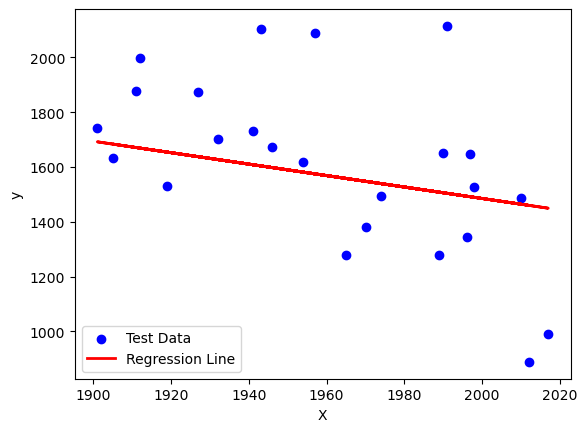

In [40]:
plt.scatter(X_test, y_test, color='b', label='Test Data')
plt.plot(X_test, y_pred, color='r', linewidth=2, label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [1]:
pwd()

'C:\\Users\\yashjadhav'